In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from keras import Sequential,regularizers,optimizers
from keras.layers import Input,Dense,Flatten,MaxPooling2D,Convolution2D,Activation,BatchNormalization,Softmax,Dropout,GlobalMaxPool2D,GlobalAveragePooling2D
import numpy as np
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.callbacks import Callback
from keras.models import load_model
from keras import Model
import random
import cv2
import keras
from cv2 import imread
import keras.initializers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import os
print(os.listdir("../input/cell_images/cell_images"))

# Any results you write to the current directory are saved as output.

['Uninfected', 'Parasitized']


In [2]:
p = Path("../input/cell_images/cell_images/")
dirs=p.glob('*')
label_dict={'Uninfected':0,'Parasitized':1}
label2class={0:'Uninfected',1:'Parasitized'}
image_data=[]
labels=[]
image_paths=[]
image_data = []
labels = []
 
#Optional
image_paths = []

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    cnt = 0
    #Iterate over folder_dir 
    for img_path in folder_dir.glob("*.png"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
        
    print(cnt)

13779
13779


In [28]:

print(labels[:10])
combined = list(zip(image_data,labels))
random.seed(4)
random.shuffle(combined)
image_data[:],labels[:] = zip(*combined)
x=np.array(image_data)
y=np.array(labels)
x=x/255.0
print(y[:10])
print(x.shape)

[1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[1 0 1 1 1 1 0 0 1 1]
(27558, 40, 40, 3)


In [29]:

from keras.utils import np_utils
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
y_test=np_utils.to_categorical(y_test)
y_train=np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(22046, 40, 40, 3) (22046, 2) (5512, 40, 40, 3) (5512, 2)


In [30]:
###CALLBACK_CLASS
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        model_matrix = self.model.evaluate(x, y, verbose=0)
        test_loss=model_matrix[0]
        test_acc=model_matrix[1]
        print('\ntest_loss: {} ,test_acc: {}\n'.format(test_loss,test_acc))
          
          
       

In [31]:
###weight intialisation
my_weight_init=keras.initializers.glorot_normal(seed=2)
my_bias_init=keras.initializers.Constant(value=0)

### model 

input=Input((40,40,3))
x=Convolution2D(32,(3,3),input_shape=(40,40,3))(input)
x=Activation('relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2),strides=2)(x)
x=Convolution2D(32,(3,3))(x)
x=Activation('relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2),strides=2)(x)
x=Convolution2D(64,(3,3))(x)
x=Convolution2D(64,(3,3))(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),strides=2)(x)
x=Flatten()(x)
x=Dropout(0.4)(x)
x=Dense(64)(x)
x=Activation('relu')(x)
x=Dense(16)(x)
x=Activation('relu')(x)
x=Dense(2,activation='softmax')(x)
model=Model(input,x)
model.summary()

    



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 38, 38, 32)        896       
_________________________________________________________________
activation_26 (Activation)   (None, 38, 38, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 38, 38, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 17, 17, 32)        9248      
_________________________________________________________________
activation_27 (Activation)   (None, 17, 17, 32)        0         
__________

In [32]:
adam = optimizers.adam(lr=1e-4)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=["accuracy"])

In [33]:

hist=model.fit(x_train, y_train, epochs=20,validation_split=0.2,batch_size=64,callbacks=[TestCallback((x_test, y_test))])

Train on 17636 samples, validate on 4410 samples
Epoch 1/20
17636/17636 [==============================] - 5s 304us/step - loss: 0.5932 - acc: 0.6955 - val_loss: 0.4822 - val_acc: 0.7560

test_loss: 0.4962577708227714 ,test_acc: 0.752177068214804

Epoch 2/20
17636/17636 [==============================] - 4s 231us/step - loss: 0.4086 - acc: 0.8138 - val_loss: 0.3318 - val_acc: 0.8440

test_loss: 0.3416454607542437 ,test_acc: 0.8428882438316401

Epoch 3/20
17636/17636 [==============================] - 4s 231us/step - loss: 0.3020 - acc: 0.8726 - val_loss: 0.3528 - val_acc: 0.8401

test_loss: 0.35682257154553654 ,test_acc: 0.8387155297532656

Epoch 4/20
17636/17636 [==============================] - 4s 230us/step - loss: 0.2330 - acc: 0.9086 - val_loss: 0.2037 - val_acc: 0.9283

test_loss: 0.20187139624651354 ,test_acc: 0.9265239477503628

Epoch 5/20
17636/17636 [==============================] - 4s 231us/step - loss: 0.1963 - acc: 0.9294 - val_loss: 0.1875 - val_acc: 0.9238

test_loss: 

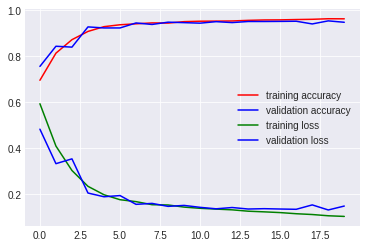

In [57]:
plt.plot(hist.history['acc'],'r-',label='training accuracy')
plt.plot(hist.history['val_acc'],'b-',label='validation accuracy')
plt.plot(hist.history['loss'],'g',label='training loss')
plt.plot(hist.history['val_loss'],'b',label='validation loss')
plt.legend()
plt.show()